In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets.public_api as tfds
import json
import os
import pathlib
import tensorflow.compat.v2 as tf
import glob
import skimage.io as io
from PIL import Image
from ipynb.fs.full.metadata import Extractor
from ipynb.fs.full.build_dataset import Custom_Dataset
from typing import Mapping, Optional, Sequence, Union

Construct the building class with the essential abstract methods for reading the Metadata file, which is supposed to be a JSON file, stored in the ~/temp/ directory on the device.

In [2]:
myDataset = Custom_Dataset()

Now the Metadata information is stored in TFDS format and accessible via _info().

In [3]:
myDataset._info()

tfds.core.DatasetInfo(
    name='custom__dataset',
    full_name='custom__dataset/1.0.0',
    description="""
    Location and Metadata features of biological EM data
    """,
    homepage='https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Biological.tar',
    data_path='/Users/nicolasblumenroehr/tensorflow_datasets/custom__dataset/1.0.0',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    }),
    supervised_keys=None,
    disable_shuffling=True,
    splits={
    },
    citation="""Contributors: {'title': 'Aversa, Rossella; Modarres, Mohammad Hadi; Cozzini, Stefano; Ciancio, Regina;', 'role': 'author'}""",
)

Additional Metadata might be accessed with the metadata attribute (Here the entire JSON file content)

In [4]:
myDataset._info().metadata

{'profile': 'data-package',
 'resources': [{'name': 'Biological',
   'path': 'https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Biological.tar',
   'profile': 'data-resource',
   'description': 'Location and Metadata features of biological EM data',
   'title': 'Biological EM data',
   'format': '.jpg'}],
 'contributors': [{'title': 'Aversa, Rossella; Modarres, Mohammad Hadi; Cozzini, Stefano; Ciancio, Regina;',
   'role': 'author'}],
 'name': 'data-package-EM',
 'title': 'EM_training_data_for_ML',
 'description': 'Example of Machine-Learning Training Data with EM images',
 'version': '1.0.0',
 'licenses': [{'title': 'Creative Commons Attribution (CC-BY)',
   'path': 'https://creativecommons.org/licenses/by/4.0/'}]}

Now the other abstract methods are used to download the dataset to ~/tensorflow_datasets/ and transfer it into TFDS format (Here only a Training data set is defined, splits for Testing or Validation can also be generated afterwards).  

In [5]:
myDataset.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling custom__dataset-train.tfrecord...:   0%|          | 0/953 [00:00<?, ? examples/s]

Dataset custom__dataset downloaded and prepared to /Users/nicolasblumenroehr/tensorflow_datasets/custom__dataset/1.0.0. Subsequent calls will reuse this data.


In [6]:
ds = myDataset.as_dataset(split="train")

Example of an image.

tf.Tensor(
[[[175 175 175]
  [180 180 180]
  [149 149 149]
  ...
  [153 153 153]
  [162 162 162]
  [154 154 154]]

 [[134 134 134]
  [147 147 147]
  [143 143 143]
  ...
  [162 162 162]
  [174 174 174]
  [173 173 173]]

 [[149 149 149]
  [146 146 146]
  [146 146 146]
  ...
  [172 172 172]
  [158 158 158]
  [143 143 143]]

 ...

 [[122 122 122]
  [155 155 155]
  [125 125 125]
  ...
  [178 178 178]
  [166 166 166]
  [195 195 195]]

 [[153 153 153]
  [140 140 140]
  [131 131 131]
  ...
  [172 172 172]
  [186 186 186]
  [157 157 157]]

 [[117 117 117]
  [145 145 145]
  [144 144 144]
  ...
  [168 168 168]
  [173 173 173]
  [161 161 161]]], shape=(768, 1024, 3), dtype=uint8)


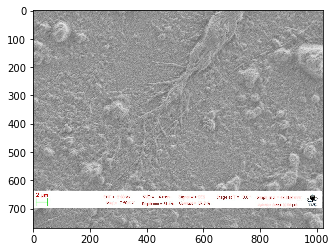

In [7]:
for an_example in ds.take(1):
    image = an_example["image"]
    print(image)
    fig = plt.figure()
    plt.tight_layout()
    plt.imshow(image, cmap='gray', interpolation='none')

The dataset persists in ~/tensorflow_datasets/ and can be reloaded (with additional metadata, now also containing information about the download and data_set size) with the subsequent method.

In [8]:
ds_reloaded, info = tfds.load("custom__dataset",with_info=True)

In [9]:
print("The splits the data set was stored with, containing the features defined in the _info() methods.")
ds_reloaded

The splits the data set was stored with, containing the features defined in the _info() methods.


{'train': <PrefetchDataset shapes: {image: (None, None, 3)}, types: {image: tf.uint8}>}

In [10]:
print(ds_reloaded["train"])
"The data set contains " + str(len(ds_reloaded["train"])) + " Images"

<PrefetchDataset shapes: {image: (None, None, 3)}, types: {image: tf.uint8}>


'The data set contains 953 Images'

In [11]:
info

tfds.core.DatasetInfo(
    name='custom__dataset',
    full_name='custom__dataset/1.0.0',
    description="""
    Location and Metadata features of biological EM data
    """,
    homepage='https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Biological.tar',
    data_path='/Users/nicolasblumenroehr/tensorflow_datasets/custom__dataset/1.0.0',
    download_size=667.88 MiB,
    dataset_size=666.28 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    }),
    supervised_keys=None,
    disable_shuffling=True,
    splits={
        'train': <SplitInfo num_examples=953, num_shards=8>,
    },
    citation="""Contributors: {'title': 'Aversa, Rossella; Modarres, Mohammad Hadi; Cozzini, Stefano; Ciancio, Regina;', 'role': 'author'}""",
)